importing the necessary libraries

In [115]:
import numpy as np
import matplotlib.pyplot as plt

given the data points

In [116]:
x = [(5.1 , 3.5) , (4.9 , 3.0) , (5.8 , 2.7) , (6.0 , 3.0) , (6.7,3.1) , (4.5 , 2.3) ,(6.1, 2.8) , (5.2,3.2),(5.5 , 2.6) ,(5.0,2.0) ,(8.0,0.5),(7.5 , 0.8) , (8.1 , -0.1) ,(2.5 , 3.5) , (1.0 , 3.0) , (4.5 , -1.0) , (3.0 , -0.5) , (5.1 , -0.2) , (6.0 , -1.5) , (3.5 , -0.1) , (4.0 , 0.0) , (6.1 , 0.5) , (5.4 , -0.5) , (5.3 , 0.3) , (5.8 , 0.6)]

(a) Implement the k-means clustering algorithm from scratch. Ensure that your im-
plementation includes:

(a) (1 point) Initialization: Use the given centroids as starting points.
(b) (2 points) Assignment: Assign each data point to the nearest centroid based
on the Euclidean distance.

(c) (2 points) Update: Recalculate the centroids after each assignment by comput-
ing the mean of all points assigned to each centroid.

(d) (1 point) Convergence Check: Terminate the algorithm if centroids do not
significantly change between iterations or after a maximum of 100 iterations.
Use a convergence threshold of 1e-4.

In [117]:
def calcdist(x , y):
    return np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

In [531]:
k = 2
cluster1 = [] ; cluster2 = [] ; startcluster1 = [] ; startcluster2 = [] 
u1 = (3.0 , 3.0) ; u2 = (2.0 , 2.0) # initalizing centroids
startu1 = u1 ; startu2 = u2
for i in range(100):
    cluster1 = [] ; cluster2 = []
    for j in range(len(x)):
        dist1 = calcdist(x[j] , u1) ; dist2 = calcdist(x[j] , u2)
        if dist1 <= dist2:
            cluster1.append(x[j]) # assigning centroid 1
        else: 
            cluster2.append(x[j]) # assigning centroid 2
    if i == 0:
        startcluster1 = cluster1 ; startcluster2 = cluster2
    # print(np.mean(cluster1 , axis = 0) , np.mean(cluster2 , axis = 0))
    # print(cluster1 ,"\n", cluster2)
    if cluster1 == []:
        newu1 = u1
    else:
        newu1 = np.mean(cluster1 , axis = 0)
    if cluster2 == []:
        newu2 = u2
    else:
        newu2 = np.mean(cluster2 , axis = 0)
    if calcdist(u1 , newu1) < 1e-4 and calcdist(u2 , newu2) < 1e-4: # checking for convergence
        print(f'Converged at iteration {i+1}')
        break
    u1 = newu1 ; u2 = newu2 # updating centroids
# print(f'{cluster1}\n{cluster2}')


Converged at iteration 3


(b) (2 points) Find the values of final centroids after the algorithm converges. Plot the
two clusters at the start of the process and at the end.

The final centroids are: u1 = [5.8   2.125] , u2 = [ 4.2        -0.05555556]
Cluster 1: [(5.1, 3.5), (4.9, 3.0), (5.8, 2.7), (6.0, 3.0), (6.7, 3.1), (4.5, 2.3), (6.1, 2.8), (5.2, 3.2), (5.5, 2.6), (5.0, 2.0), (8.0, 0.5), (7.5, 0.8), (8.1, -0.1), (2.5, 3.5), (6.1, 0.5), (5.8, 0.6)]
Cluster 2: [(1.0, 3.0), (4.5, -1.0), (3.0, -0.5), (5.1, -0.2), (6.0, -1.5), (3.5, -0.1), (4.0, 0.0), (5.4, -0.5), (5.3, 0.3)]


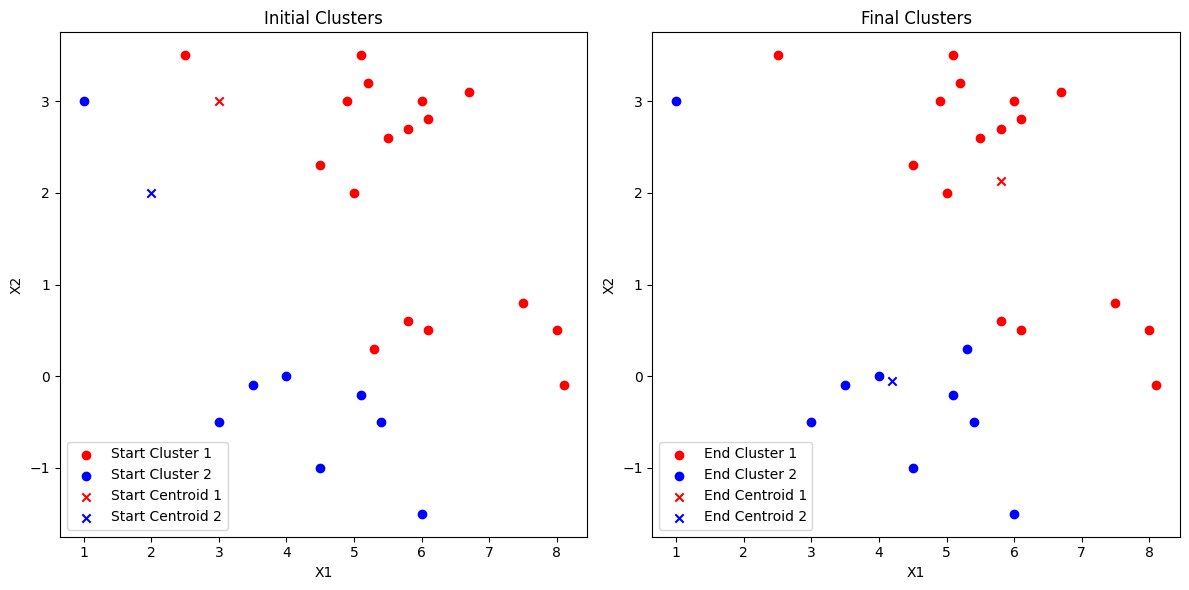

In [532]:
print(f'The final centroids are: u1 = {u1} , u2 = {u2}') # final centroids
print(f'Cluster 1: {cluster1}\nCluster 2: {cluster2}') # final clusters
startcluster1 = np.array(startcluster1) ; startcluster2 = np.array(startcluster2)
cluster1 = np.array(cluster1) ; cluster2 = np.array(cluster2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(startcluster1[:,0],startcluster1[:,1],color = 'red',label = 'Start Cluster 1')
plt.scatter(startcluster2[:,0],startcluster2[:,1],color = 'blue',label = 'Start Cluster 2')
plt.scatter(startu1[0],startu1[1],color = 'red',label = 'Start Centroid 1' , marker = 'x')
plt.scatter(startu2[0],startu2[1],color = 'blue',label = 'Start Centroid 2' , marker='x')
plt.title('Initial Clusters')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.subplot(1,2,2)
plt.scatter(cluster1[:,0],cluster1[:,1],color = 'red',label = 'End Cluster 1')
plt.scatter(cluster2[:,0],cluster2[:,1],color = 'blue',label = 'End Cluster 2')
plt.scatter(u1[0],u1[1],color = 'red',label = 'End Centroid 1' , marker = 'x')
plt.scatter(u2[0],u2[1],color = 'blue',label = 'End Centroid 2' , marker='x')
plt.title('Final Clusters')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()


(c) (2 points) Compare the results using the provided initial centroids versus using
random initialization of centroids.

In [ ]:
u1random = (np.random.uniform(0,10) , np.random.uniform(0,10)) ; u2random = (np.random.uniform(0,10) , np.random.uniform(0,10))
print(f'The random centroids are: u1 = {u1random} , u2 = {u2random}') 
u1randstart = u1random ; u2randstart = u2random
randcluster1 = [] ; randcluster2 = [] ; startrandcluster1 = [] ; startrandcluster2 = []
for i in range(100):
    randcluster1 = [] ; randcluster2 = []
    for j in range(len(x)):
        dist1 = calcdist(x[j] , u1random) ; dist2 = calcdist(x[j] , u2random)
        if dist1 <= dist2:
            randcluster1.append(x[j]) # assigning centroid 1
        else: 
            randcluster2.append(x[j]) # assigning centroid 2
    if i == 0:
        startrandcluster1 = randcluster1 ; startrandcluster2 = randcluster2
    # print(np.mean(cluster1 , axis = 0) , np.mean(cluster2 , axis = 0))
    # print(cluster1 ,"\n", cluster2)
    if randcluster1 == []:
        newu1rand = u1random
    else:
        newu1rand = np.mean(randcluster1 , axis = 0)
    if randcluster2== []:
        newu2rand = u2random
    else:
        newu2rand = np.mean(randcluster2 , axis = 0)
    if calcdist(u1random , newu1rand) < 1e-4 and calcdist(u2random , newu2rand) < 1e-4: # checking for convergence
        print(f'Converged at iteration {i+1}')
        break
    u1random = newu1rand ; u2random = newu2rand # updating centroids

The random centroids are: u1 = (0.6413525223738326, 2.262695847584352) , u2 = (7.929022783296357, 8.04396446915202)
Converged at 6th iteration


The final centroids for random init are: u1 = [4.35       0.34166667], u2 = [6.03076923 2.26153846]
Cluster 1: [(2.5, 3.5), (1.0, 3.0), (4.5, -1.0), (3.0, -0.5), (5.1, -0.2), (6.0, -1.5), (3.5, -0.1), (4.0, 0.0), (6.1, 0.5), (5.4, -0.5), (5.3, 0.3), (5.8, 0.6)]
Cluster 2: [(5.1, 3.5), (4.9, 3.0), (5.8, 2.7), (6.0, 3.0), (6.7, 3.1), (4.5, 2.3), (6.1, 2.8), (5.2, 3.2), (5.5, 2.6), (5.0, 2.0), (8.0, 0.5), (7.5, 0.8), (8.1, -0.1)]


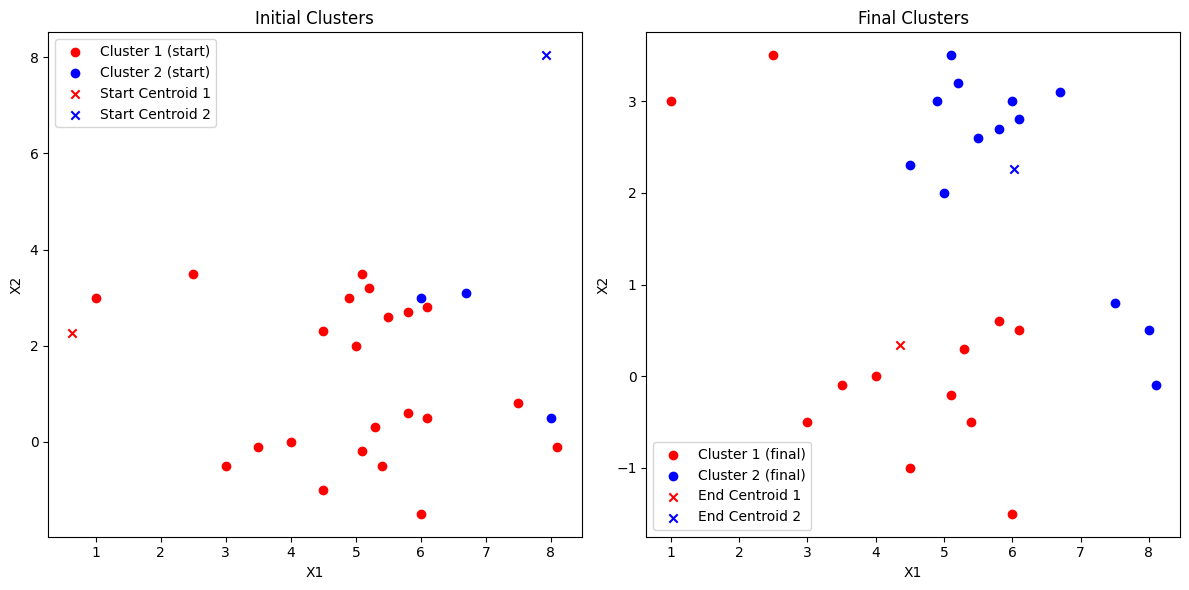

In [535]:
# Final centroids
print(f'The final centroids for random init are: u1 = {u1random}, u2 = {u2random}')
print(f'Cluster 1: {randcluster1}\nCluster 2: {randcluster2}')
startrandcluster1 = np.array(startrandcluster1) ; startrandcluster2 = np.array(startrandcluster2)
randcluster1 = np.array(randcluster1) ;randcluster2 = np.array(randcluster2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
if len(startrandcluster1) > 0:
    plt.scatter(startrandcluster1[:, 0], startrandcluster1[:, 1], color='red', label='Cluster 1 (start)')
if len(startrandcluster2) > 0:
    plt.scatter(startrandcluster2[:, 0], startrandcluster2[:, 1], color='blue', label='Cluster 2 (start)')
plt.scatter(u1randstart[0], u1randstart[1], color='red', label='Start Centroid 1', marker='x')
plt.scatter(u2randstart[0], u2randstart[1], color='blue', label='Start Centroid 2', marker='x')
plt.title('Initial Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.subplot(1, 2, 2)
if len(randcluster1) > 0:
    plt.scatter(randcluster1[:, 0], randcluster1[:, 1], color='red', label='Cluster 1 (final)')
if len(randcluster2) > 0:
    plt.scatter(randcluster2[:, 0], randcluster2[:, 1], color='blue', label='Cluster 2 (final)')
plt.scatter(u1random[0], u1random[1], color='red', label='End Centroid 1', marker='x')
plt.scatter(u2random[0], u2random[1], color='blue', label='End Centroid 2', marker='x')
plt.title('Final Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.tight_layout()
plt.show()

(d) (5 points) Determine the optimal number of clusters, M, using the Elbow method.
Plot the Within-Cluster Sum of Squares (WCSS) against different values of k to
find the elbow point. Randomly initialize M centroids, perform clustering and plot
the resulting clusters

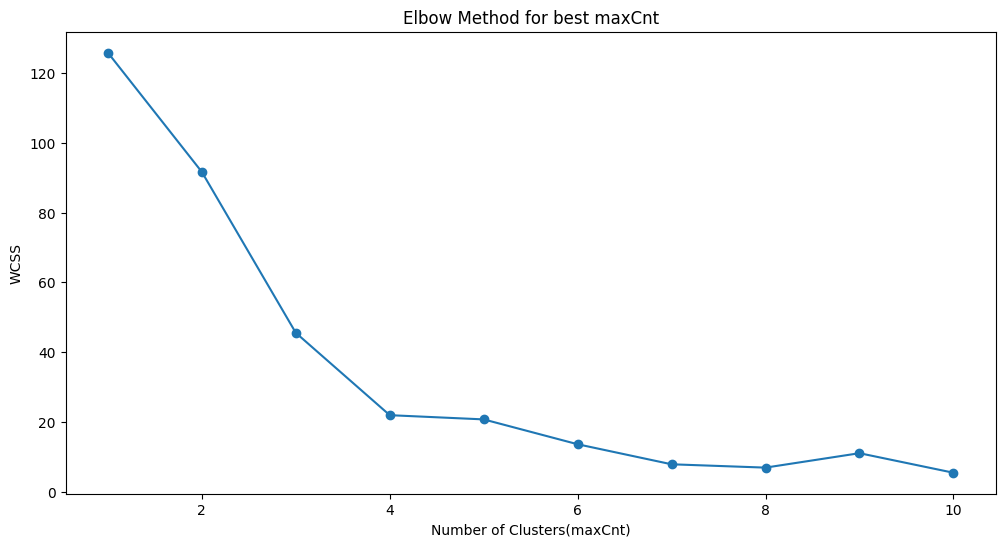

In [527]:
def wcsskmeans(x , maxCnt):
    clusters = [[] for i in range(maxCnt)]
    centroidsval = [x[np.random.randint(0 , len(x))] for i in range(maxCnt)]
    for i in range(100):
        clusters = [[] for i in range(maxCnt)]
        for j in range(len(x)):
            dists = [calcdist(x[j] , centroidsval[k]) for k in range(maxCnt)]
            closestCluster = np.argmin(dists)
            clusters[closestCluster].append(x[j])
        newCentroid = []
        for j in range(maxCnt):
            if clusters[j] == []:
                newCentroid.append(centroidsval[j])
            else:
                newCentroid.append(np.mean(clusters[j] , axis = 0))
        if all(calcdist(centroidsval[l] , newCentroid[l]) < 1e-4 for l in range(maxCnt)):
            break
        centroidsval = newCentroid
    wcss = 0
    for i in range(maxCnt):
        if len(clusters[i]) > 0:
            wcss += np.sum((np.array(clusters[i]) - centroidsval[i])**2)
    return wcss 

storewcss = []
k = 10
for i in range(1 , k + 1):
    wcss = wcsskmeans(x , i)
    storewcss.append(wcss)
plt.figure(figsize=(12,6))
plt.plot(range(1 , k +1) , storewcss, marker = 'o')   
plt.title('Elbow Method for best maxCnt')
plt.xlabel('Number of Clusters(maxCnt)')
plt.ylabel('WCSS')
plt.show()

So we got the elbow point at Number of Clusters as 4

In [558]:
centroid4 = [tuple(np.random.uniform(0,10,2)) for i in range(4)]
print(f'The random centroids are: {centroid4}')
centroid4start = centroid4
clusters = [[] for i in range(4)] ; startclusters = [[] for i in range(4)]
for i in range(100):
    clusters = [[] for j in range(4)]
    for j in range(len(x)):
        dist = [calcdist(x[j] , centroid4[k]) for k in range(4)]
        closestClust = np.argmin(dist)
        clusters[closestClust].append(x[j])
    if i == 0:
        startclusters = [x.copy() for x in clusters] 
    newCentroid = []
    for j in range(4):
        if len(clusters[j]) == 0:
            newCentroid.append(centroid4[j])
        else:
            newCentroid.append(tuple(np.mean(clusters[j] , axis = 0)))
    pos = True
    for j in range(4):
        if calcdist(centroid4[j] , newCentroid[j]) >= 1e-4:
            pos = False
            break
    if pos:
        print(f'Converged at iteration {i+1}')
        break
    centroid4 = newCentroid
print(f'The final centroids are: {centroid4}')

The random centroids are: [(8.114075027006562, 1.0972380124712011), (1.2175199764767841, 5.944738549126189), (3.448891741731833, 0.3490585907310928), (5.416415078330531, 3.878450996858469)]
Converged at iteration 2
The final centroids are: [(7.425000000000001, 0.425), (1.75, 3.25), (4.7333333333333325, -0.32222222222222224), (5.48, 2.82)]


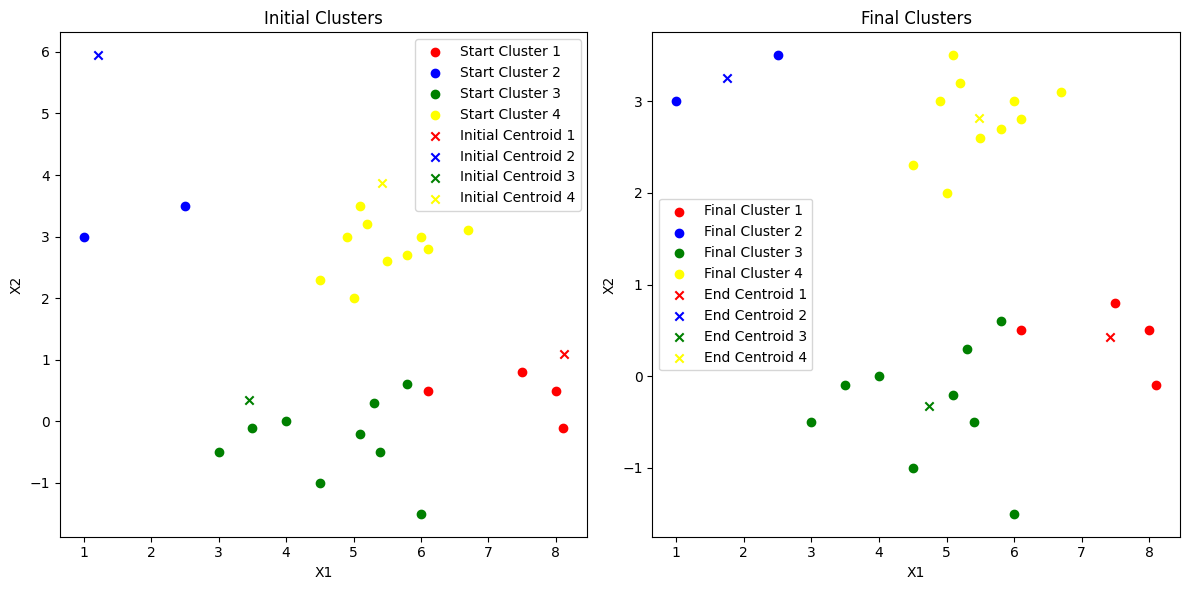

In [559]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
colors = ['red' , 'blue' , 'green' , 'yellow']
# centroidColors = ['purple' , 'orange' , 'brown' , 'pink']
for i in range(4):
    startclus1 = np.array(startclusters[i])
    if len(startclus1) > 0:
        plt.scatter(startclus1[:,0] , startclus1[:,1] , color = colors[i] , label = f'Start Cluster {i+1}')
for i in range(4):
    plt.scatter(centroid4start[i][0] , centroid4start[i][1] , color = colors[i] , label = f'Initial Centroid {i+1}' , marker = 'x')
plt.title('Initial Clusters')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1,2,2)
for i in range(4):
    lastclus1 = np.array(clusters[i])
    if len(lastclus1) > 0:
        plt.scatter(lastclus1[:,0] , lastclus1[:,1] , color = colors[i] , label = f'Final Cluster {i+1}')
for i in range(4):
    plt.scatter(centroid4[i][0] , centroid4[i][1] , color = colors[i] , label = f'End Centroid {i+1}' , marker = 'x')
plt.title('Final Clusters')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.tight_layout()
plt.show()